# 13주차 과제

## 주제 : Admission_Predict 데이터 셋을 통하여 학교등급과 합격여부의 관련성 확인

- 가설 : University.Rating에 따라 Chance.of.Admit 에 영향을 줄것이다.
- 대립 가설 : University.Rating	와 Chance.of.Admit 은 연관성이 없을것이다.

`Admission_Predict.csv` 파일을 불려옵니다.

In [1]:
data <- read.csv("Admission_Predict.csv")
#https://stats.idre.ucla.edu/stat/data/binary.csv

In [2]:
head(data)

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.90


In [3]:
str(data)

'data.frame':	400 obs. of  9 variables:
 $ Serial.No.       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GRE.Score        : int  337 324 316 322 314 330 321 308 302 323 ...
 $ TOEFL.Score      : int  118 107 104 110 103 115 109 101 102 108 ...
 $ University.Rating: int  4 4 3 3 2 5 3 2 1 3 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 3.5 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 3 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ Research         : int  1 1 1 1 0 1 1 0 0 0 ...
 $ Chance.of.Admit  : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...


데이터 세트에는 400개의 석사 프로그램 신청 중인 데이터이며 여러 매개 변수가 포함되어 있습니다.

포함 된 매개 변수는 다음과 같습니다.

- GRE.Score : GRE 점수 (340 점 만점)
- TOEFL.Score : TOEFL 점수 (120 점 만점)
- University.Rating: 대학 평가 (5 점 만점)
- SOP : 목적 진술서 및 추천 강도 서신 (5 점 만점)
- LOR : 학부 평점 (10 점 만점)
- CGPA : 연구 경험 (0 또는 1)
- Chance.of.Admit : 승인 기회 (0 ~ 1 범위)

곁측치가 있는지 확인합니다.

In [22]:
library(naniar)

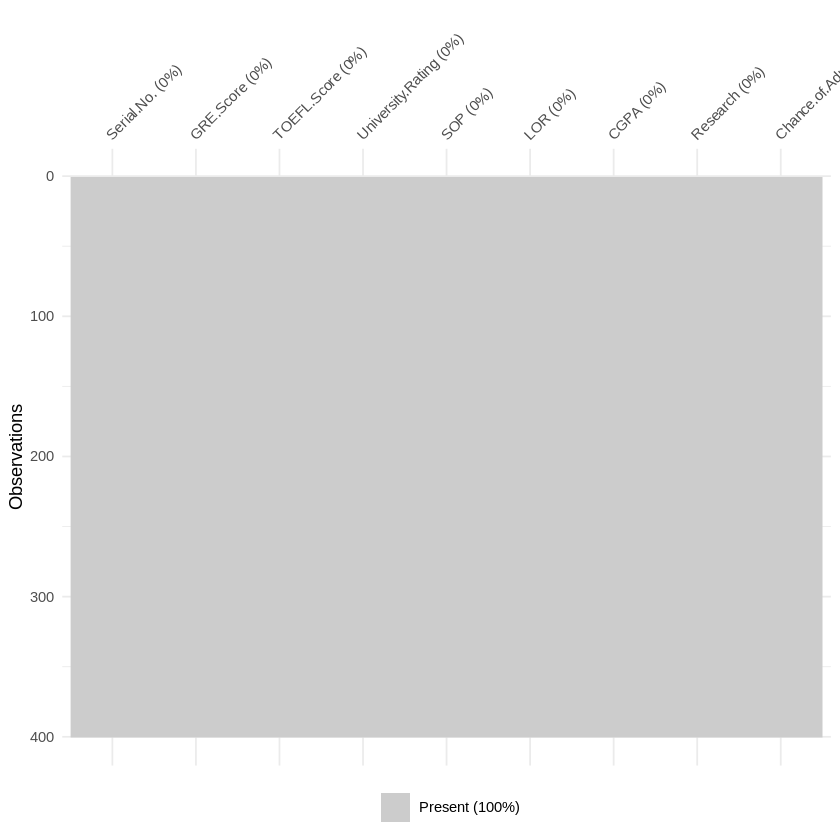

In [23]:
vis_miss(data)

해당 데이터는 곁측치가 없는것으로 확인되었습니다.

## 산점도 그리기

- GRE.Score 와 University.Rating 별로 산점도를 그립니다.

In [25]:
library(ggplot2)

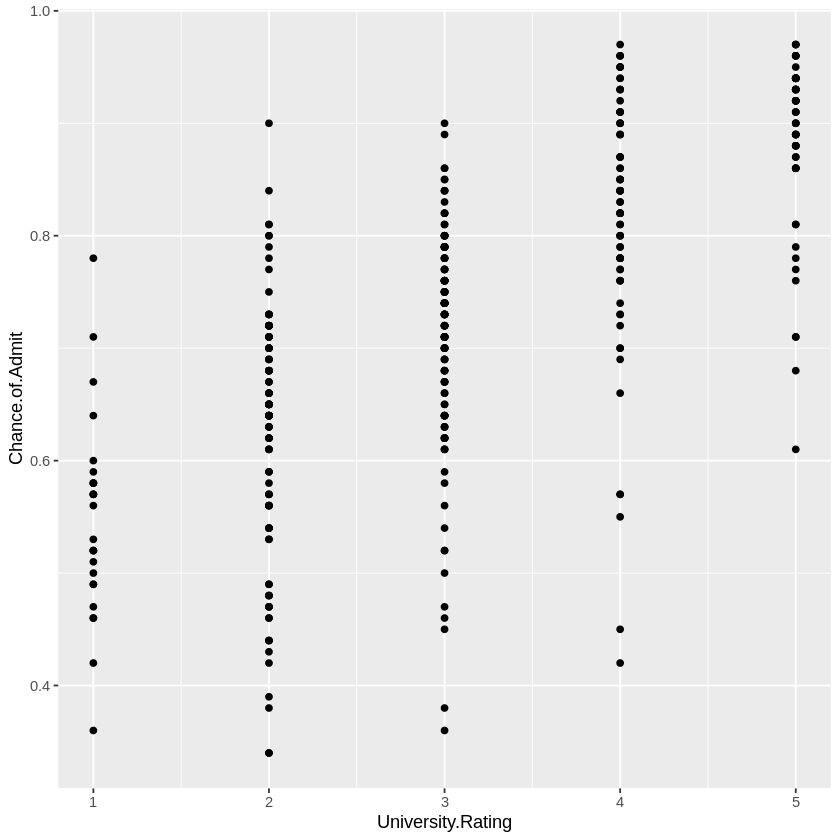

In [27]:
ggplot(data=data,aes(x=University.Rating,y=Chance.of.Admit))+geom_point()

산점도를 확인해보면 대략 10프로 에서 가설을 입증할수 있을것 같습니다.

필요한 데이터만 추출을 합니다.

In [55]:
data2 <- data.frame(data$Chance.of.Admit , data$GRE.Score , data$CGPA , data$University.Rating)
names(data2) <- c("admit", "gre" , "gpa" , "rank")
head(data2)
str(data2)

,admit,gre,gpa,rank
,<dbl>,<int>,<dbl>,<int>
1,0.92,337,9.65,4
2,0.76,324,8.87,4
3,0.72,316,8.00,3
4,0.80,322,8.67,3
5,0.65,314,8.21,2
6,0.90,330,9.34,5


'data.frame':	400 obs. of  4 variables:
 $ admit: num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.45 ...
 $ gre  : int  337 324 316 322 314 330 321 308 302 323 ...
 $ gpa  : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 8.6 ...
 $ rank : int  4 4 3 3 2 5 3 2 1 3 ...


로지스틱 회귀분석을 위하여 종속변수가 2개의 범주(0,1)을 가지기 위해서

admit 변수에서 0.5 이상이면 1 0.5 이하이면 0 으로 admit_50 이라는 변수를 생성합니다.

In [56]:
data2$admit_50 <- ifelse(data2$admit > 0.5, 1, 0)
head(data2)

,admit,gre,gpa,rank,admit_50
,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0.92,337,9.65,4,1
2,0.76,324,8.87,4,1
3,0.72,316,8.00,3,1
4,0.80,322,8.67,3,1
5,0.65,314,8.21,2,1
6,0.90,330,9.34,5,1


학교 등급을 나타내는 rank변수는 범주형이므로 factor 처리 합니다.

In [57]:
data2$rank <-as.factor(data2$rank)
head(data2)

,admit,gre,gpa,rank,admit_50
,<dbl>,<int>,<dbl>,<fct>,<dbl>
1,0.92,337,9.65,4,1
2,0.76,324,8.87,4,1
3,0.72,316,8.00,3,1
4,0.80,322,8.67,3,1
5,0.65,314,8.21,2,1
6,0.90,330,9.34,5,1


train set과 test set을 나누어, train set으로 모델을 세우고, test셋으로 결과를 확인 합니다.

일반적으로 train set 에 70%, test set에 30%정도 지정합니다.

In [58]:
400 * 0.7

[1] 280

In [59]:
400 * 0.3

[1] 120

In [60]:
train<-data2[1:280, ]
test<-data2[281:400, ]

위에서 지정한 train set으로 로지스틱 회귀분석 model을 세웁니다.
y가 0과 1뿐인 이산형 변수이므로 'family = binomial'이라는 옵션을 넣어줍니다.

In [61]:
model <- glm(admit_50 ~ gre + gpa + rank, data =train, family = "binomial")
summary(model)


Call:
glm(formula = admit_50 ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0814   0.0001   0.1011   0.3177   1.5440  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -51.58907   12.04182  -4.284 1.83e-05 ***
gre            0.08109    0.04051   2.002   0.0453 *  
gpa            3.65783    0.89852   4.071 4.68e-05 ***
rank2         -1.08108    0.86390  -1.251   0.2108    
rank3         -1.32172    0.98703  -1.339   0.1805    
rank4         -1.60907    1.37829  -1.167   0.2430    
rank5         12.26436 1213.79749   0.010   0.9919    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 163.805  on 279  degrees of freedom
Residual deviance:  92.162  on 273  degrees of freedom
AIC: 106.16

Number of Fisher Scoring iterations: 18


표의 가장 우측 열의 p-value가 0.05보다 작은 변수는 없으므로 통계적으로 유의한 변수가 없습니다.

p_value가 0.05보다 작은 변수은 없으으로 가설을 입증할수가 없습니다.

## ROC 커브

로지스틱 회귀 모델의 평가를 하기 위해 ROC 커브를 그려겠습니다.

In [62]:
library(ROCR)

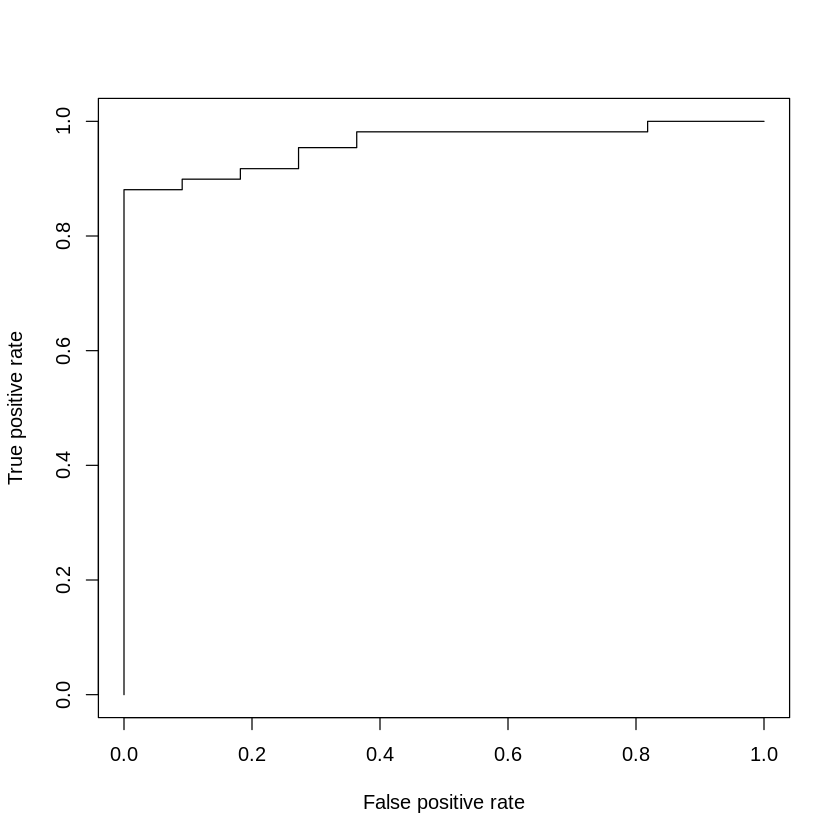

In [63]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$admit_50)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

admit 변수에서 0.5 이상인 점수을 종속변수로 만들지 않고 `Chance.of.Admit` 에서 상위 10% 이내로 종속변수로 변경합니다.

In [65]:
data3 <- data.frame(data$Chance.of.Admit , data$GRE.Score , data$CGPA , data$University.Rating)
names(data3) <- c("admit", "gre" , "gpa" , "rank")

data3 에서 admit 변수에 순위를 매김니다.

In [66]:
data3$admit_rank <- order(data3$admit)
head(data3)

,admit,gre,gpa,rank,admit_rank
,<dbl>,<int>,<dbl>,<int>,<int>
1,0.92,337,9.65,4,93
2,0.76,324,8.87,4,377
3,0.72,316,8.00,3,59
4,0.80,322,8.67,3,95
5,0.65,314,8.21,2,92
6,0.90,330,9.34,5,376


admit_rank 변수에 40 보다 작으면 1 , 크면 0 으로 설정합니다.

In [67]:
data3$admit_10 <- ifelse(data3$admit_rank < 40, 1, 0)
head(data3)

,admit,gre,gpa,rank,admit_rank,admit_10
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,0.92,337,9.65,4,93,0
2,0.76,324,8.87,4,377,0
3,0.72,316,8.00,3,59,0
4,0.80,322,8.67,3,95,0
5,0.65,314,8.21,2,92,0
6,0.90,330,9.34,5,376,0


In [68]:
data3$rank <-as.factor(data3$rank)
head(data3)

,admit,gre,gpa,rank,admit_rank,admit_10
,<dbl>,<int>,<dbl>,<fct>,<int>,<dbl>
1,0.92,337,9.65,4,93,0
2,0.76,324,8.87,4,377,0
3,0.72,316,8.00,3,59,0
4,0.80,322,8.67,3,95,0
5,0.65,314,8.21,2,92,0
6,0.90,330,9.34,5,376,0


In [69]:
train2<-data3[1:280, ]
test2<-data3[281:400, ]

In [70]:
model2 <- glm(admit_10 ~ gre + gpa + rank, data =train2, family = "binomial")
summary(model2)


Call:
glm(formula = admit_10 ~ gre + gpa + rank, family = "binomial", 
    data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7385  -0.4920  -0.4205  -0.3714   2.5532  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  1.88896    7.08681   0.267    0.790
gre         -0.03689    0.03194  -1.155    0.248
gpa          0.95000    0.71148   1.335    0.182
rank2       -0.90120    0.92593  -0.973    0.330
rank3       -0.20800    0.90373  -0.230    0.818
rank4       -0.76270    1.08918  -0.700    0.484
rank5       -1.13003    1.19849  -0.943    0.346

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 182.05  on 279  degrees of freedom
Residual deviance: 177.59  on 273  degrees of freedom
AIC: 191.59

Number of Fisher Scoring iterations: 5


## 모델 해석

표의 가장 우측 열의 p-value가 0.05보다 작은 변수는 gre, rank3, rank4 입니다.

이 세가지가 모두 통계적으로 유의하다고 해석 할 수 있습니다. 

rank2 의 p-value가 가장 낮은 것으로 보아 예측력이 좀더 강한 것으로 보이며. 

Estimate 열의 부호가 마이너스(-) 이므로 학교의 랭크에 따라 admit 변수어 어느정도 영향을 줄수있다고 판단이 됩니다.

## ROC 커브

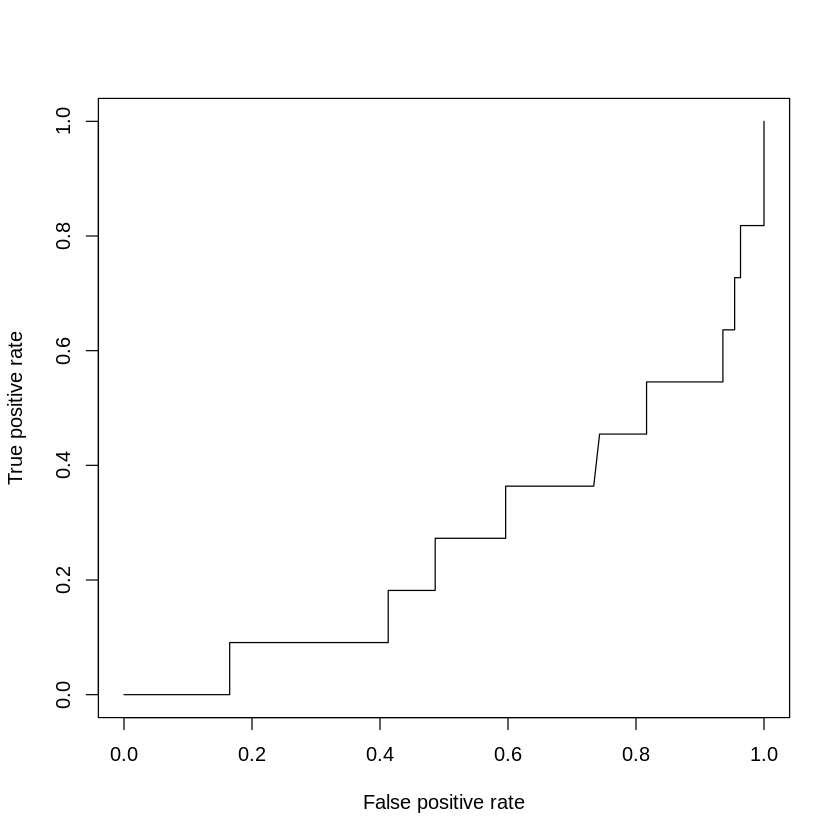

In [71]:
p2 <- predict(model2, newdata=test2, type="response")
pr2 <- prediction(p2, test2$admit_10)
prf2 <- performance(pr2, measure = "tpr", x.measure = "fpr")
plot(prf2)